In [1]:
import torch
print(torch.__version__)

if torch.torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device= "cpu"
print (f"using device = {device}");  
          

2.10.0
using device = mps


In [2]:
train_dir= "data/train"
test_dir= "data/val"

In [3]:
from torchvision  import datasets , transforms
from torch.utils.data import DataLoader
from torch import nn
# Define Augumentation
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
# Load datasets
train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform)

In [5]:
# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [6]:
print(f'training samples: {len(train_data)}')
print(f'test samples: {len(test_data)}')


training samples: 9469
test samples: 3925


In [7]:
class_names_idx = train_data.class_to_idx
print(class_names_idx)

{'n01440764': 0, 'n02102040': 1, 'n02979186': 2, 'n03000684': 3, 'n03028079': 4, 'n03394916': 5, 'n03417042': 6, 'n03425413': 7, 'n03445777': 8, 'n03888257': 9}


In [8]:
from model import CustomCNN


In [9]:
#  Initialize Object
num_classes = len(train_data.classes)

model = CustomCNN(num_classes).to(device)

In [ ]:
# Ensure model is on the correct device
from torchinfo import summary

# 
model.to(device)

summary(
    model=model,
    input_size=(32, 3, 128, 128),
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"],
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
CustomCNN (CustomCNN)                    [32, 3, 128, 128]    [32, 10]             --                   True
├─Conv2d (conv1)                         [32, 3, 128, 128]    [32, 32, 128, 128]   896                  True
├─ReLU (relu)                            [32, 32, 128, 128]   [32, 32, 128, 128]   --                   --
├─MaxPool2d (pool)                       [32, 32, 128, 128]   [32, 32, 64, 64]     --                   --
├─Conv2d (conv2)                         [32, 32, 64, 64]     [32, 64, 64, 64]     18,496               True
├─ReLU (relu)                            [32, 64, 64, 64]     [32, 64, 64, 64]     --                   --
├─MaxPool2d (pool)                       [32, 64, 64, 64]     [32, 64, 32, 32]     --                   --
├─Conv2d (conv3)                         [32, 64, 32, 32]     [32, 128, 32, 32]    73,856               True
├─ReLU (relu)         

In [12]:
# define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.001,
                            weight_decay=1e-4)

In [16]:
# set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start timer
from timeit import default_timer as timer
from trainNN import train

start_time = timer()

results = train(model= model, 
                train_dataloader=train_loader,
                test_dataloader=test_loader,
                optimizer=optimizer,
                loss_fn=criterion,
                epochs=30,
                device=device)

end_time =timer()
print(f"[Info] Total trainig Time:  {end_time- start_time} seconds ")


Epochs:   3%|▎         | 1/30 [01:01<29:54, 61.88s/it]

Epoch: 1 | train_loss: 1.6351 | train_acc: 0.4449 | test_loss: 1.3535 | test_acc: 0.5581
[INFO] New best model saved to best_model.pth with test_acc: 0.5581


Epochs:   7%|▋         | 2/30 [02:00<27:52, 59.75s/it]

Epoch: 2 | train_loss: 1.1389 | train_acc: 0.6290 | test_loss: 1.1142 | test_acc: 0.6230
[INFO] New best model saved to best_model.pth with test_acc: 0.6230


Epochs:  10%|█         | 3/30 [02:58<26:41, 59.33s/it]

Epoch: 3 | train_loss: 0.9034 | train_acc: 0.7036 | test_loss: 1.0775 | test_acc: 0.6488
[INFO] New best model saved to best_model.pth with test_acc: 0.6488


Epochs:  13%|█▎        | 4/30 [03:57<25:33, 59.00s/it]

Epoch: 4 | train_loss: 0.6854 | train_acc: 0.7761 | test_loss: 1.1122 | test_acc: 0.6390


Epochs:  17%|█▋        | 5/30 [04:55<24:30, 58.83s/it]

Epoch: 5 | train_loss: 0.4573 | train_acc: 0.8520 | test_loss: 1.2087 | test_acc: 0.6630
[INFO] New best model saved to best_model.pth with test_acc: 0.6630


Epochs:  20%|██        | 6/30 [05:53<23:19, 58.31s/it]

Epoch: 6 | train_loss: 0.2516 | train_acc: 0.9201 | test_loss: 1.5223 | test_acc: 0.6501


Epochs:  23%|██▎       | 7/30 [06:52<22:26, 58.55s/it]

Epoch: 7 | train_loss: 0.1377 | train_acc: 0.9553 | test_loss: 1.8199 | test_acc: 0.6520


Epochs:  27%|██▋       | 8/30 [07:50<21:27, 58.54s/it]

Epoch: 8 | train_loss: 0.1030 | train_acc: 0.9668 | test_loss: 1.8373 | test_acc: 0.6600


Epochs:  30%|███       | 9/30 [08:49<20:28, 58.49s/it]

Epoch: 9 | train_loss: 0.0916 | train_acc: 0.9689 | test_loss: 2.0777 | test_acc: 0.6312


Epochs:  33%|███▎      | 10/30 [09:49<19:38, 58.90s/it]

Epoch: 10 | train_loss: 0.0636 | train_acc: 0.9793 | test_loss: 2.2227 | test_acc: 0.6348


Epochs:  37%|███▋      | 11/30 [10:48<18:44, 59.17s/it]

Epoch: 11 | train_loss: 0.0916 | train_acc: 0.9712 | test_loss: 2.2493 | test_acc: 0.6379


Epochs:  40%|████      | 12/30 [11:49<17:53, 59.66s/it]

Epoch: 12 | train_loss: 0.0659 | train_acc: 0.9787 | test_loss: 2.3574 | test_acc: 0.6505


Epochs:  43%|████▎     | 13/30 [12:48<16:52, 59.57s/it]

Epoch: 13 | train_loss: 0.0624 | train_acc: 0.9803 | test_loss: 2.4108 | test_acc: 0.6383


Epochs:  47%|████▋     | 14/30 [13:49<15:55, 59.72s/it]

Epoch: 14 | train_loss: 0.0862 | train_acc: 0.9718 | test_loss: 2.2982 | test_acc: 0.6463


Epochs:  50%|█████     | 15/30 [14:48<14:53, 59.59s/it]

Epoch: 15 | train_loss: 0.0527 | train_acc: 0.9813 | test_loss: 2.5234 | test_acc: 0.6402


Epochs:  53%|█████▎    | 16/30 [15:46<13:48, 59.17s/it]

Epoch: 16 | train_loss: 0.0359 | train_acc: 0.9897 | test_loss: 2.8058 | test_acc: 0.6267


Epochs:  57%|█████▋    | 17/30 [16:45<12:49, 59.18s/it]

Epoch: 17 | train_loss: 0.0709 | train_acc: 0.9790 | test_loss: 2.4253 | test_acc: 0.6366


Epochs:  60%|██████    | 18/30 [17:44<11:47, 58.93s/it]

Epoch: 18 | train_loss: 0.0522 | train_acc: 0.9821 | test_loss: 2.6482 | test_acc: 0.6456


Epochs:  63%|██████▎   | 19/30 [18:41<10:43, 58.52s/it]

Epoch: 19 | train_loss: 0.0622 | train_acc: 0.9804 | test_loss: 2.5858 | test_acc: 0.6496


Epochs:  67%|██████▋   | 20/30 [19:39<09:43, 58.36s/it]

Epoch: 20 | train_loss: 0.0673 | train_acc: 0.9768 | test_loss: 2.4264 | test_acc: 0.6511


Epochs:  70%|███████   | 21/30 [20:41<08:53, 59.28s/it]

Epoch: 21 | train_loss: 0.0207 | train_acc: 0.9943 | test_loss: 2.7525 | test_acc: 0.6436


Epochs:  73%|███████▎  | 22/30 [21:41<07:56, 59.60s/it]

Epoch: 22 | train_loss: 0.0123 | train_acc: 0.9967 | test_loss: 2.7595 | test_acc: 0.6614


Epochs:  77%|███████▋  | 23/30 [22:41<06:58, 59.78s/it]

Epoch: 23 | train_loss: 0.0748 | train_acc: 0.9777 | test_loss: 2.9028 | test_acc: 0.6170


Epochs:  80%|████████  | 24/30 [23:40<05:56, 59.47s/it]

Epoch: 24 | train_loss: 0.0828 | train_acc: 0.9752 | test_loss: 2.4309 | test_acc: 0.6526


Epochs:  83%|████████▎ | 25/30 [24:39<04:56, 59.27s/it]

Epoch: 25 | train_loss: 0.0317 | train_acc: 0.9892 | test_loss: 2.5939 | test_acc: 0.6430


Epochs:  87%|████████▋ | 26/30 [25:37<03:56, 59.10s/it]

Epoch: 26 | train_loss: 0.0237 | train_acc: 0.9940 | test_loss: 2.7187 | test_acc: 0.6535


Epochs:  90%|█████████ | 27/30 [26:36<02:57, 59.01s/it]

Epoch: 27 | train_loss: 0.0496 | train_acc: 0.9853 | test_loss: 2.6885 | test_acc: 0.6487


Epochs:  93%|█████████▎| 28/30 [42:06<10:40, 320.27s/it]

Epoch: 28 | train_loss: 0.0602 | train_acc: 0.9810 | test_loss: 2.6173 | test_acc: 0.6326


Epochs:  97%|█████████▋| 29/30 [43:08<04:02, 242.75s/it]

Epoch: 29 | train_loss: 0.0237 | train_acc: 0.9920 | test_loss: 2.9168 | test_acc: 0.6322


Epochs: 100%|██████████| 30/30 [44:11<00:00, 88.37s/it] 

Epoch: 30 | train_loss: 0.0320 | train_acc: 0.9904 | test_loss: 2.7357 | test_acc: 0.6317
[Info] Total trainig Time:  1784.1344373750035 seconds 


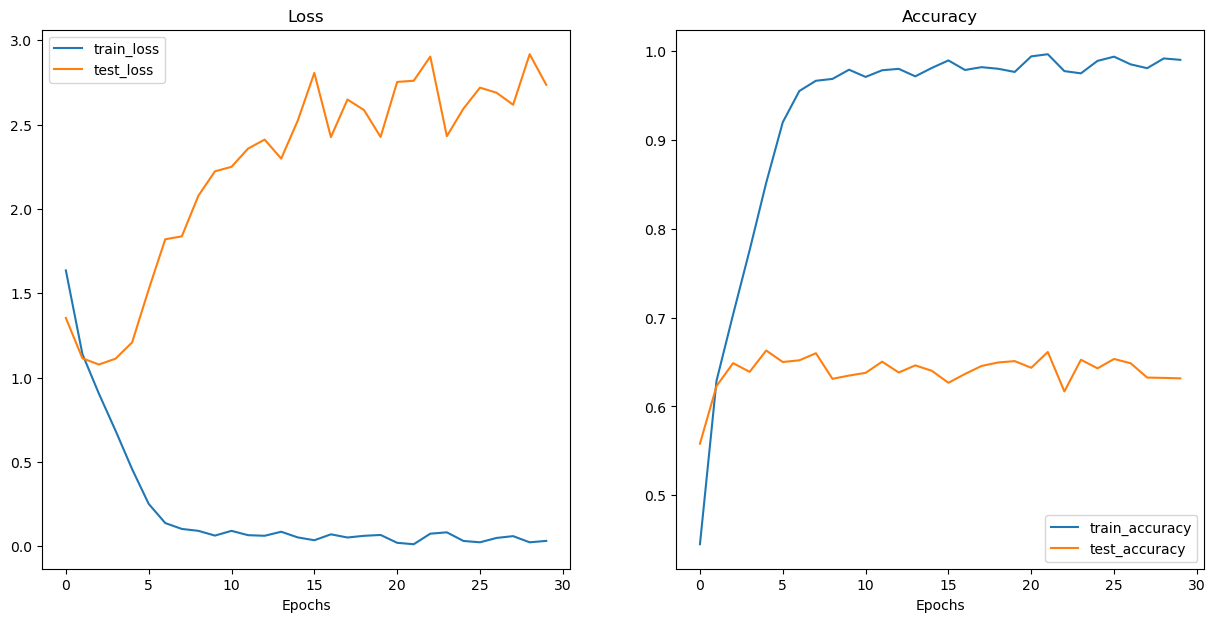

In [17]:
from helper_functions import plot_loss_curves
plot_loss_curves(results)